In [13]:
import cv2, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
class_names = {'times':"*", 'div':"//"}
classes = os.listdir("./VS_data")

In [19]:
base = "./VS_data"

X = []
y = []
for cls in classes:
    base_folder = os.path.join(base, cls)
    for f in os.listdir(base_folder):        
        im = cv2.imread(os.path.join(base_folder, f), cv2.IMREAD_GRAYSCALE)
        ret, thresh = cv2.threshold(im, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        im = (thresh != 255).astype("uint")
        X.append(im.reshape(1,-1))
        if class_names.get(cls) is None:
            y.append(cls)
        else:
            y.append(class_names[cls])

In [20]:
X = np.array(X).reshape(-1, 45*45)

In [21]:
y = np.array(y).reshape(-1, 1)

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
encoder = LabelEncoder()
y_ = encoder.fit_transform(y)

In [24]:
y_ = np.cast["uint8"](y_).reshape(-1,1)

In [25]:
data = np.hstack([X, y_])

In [26]:
db = pd.DataFrame(data, columns=list(range(45*45)) + ["class"])

In [27]:
db.to_csv("./data.csv", index=False)

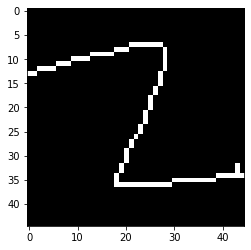

In [47]:
plt.imshow(X[30000].reshape(45,45), cmap="gray")
plt.show()

In [48]:
y[30000]

array(['2'], dtype='<U2')